In [1]:
import umap

In [2]:
import pickle

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(555)

import matplotlib.pyplot
plt.style.use('ggplot')

In [4]:
data = pd.read_csv('german_credit.csv')
y = data['default']
X_df = data.drop('default', axis=1)

cats = [X_df.dtypes.index[i] for i in range(X_df.shape[1]) if X_df.dtypes[i]=='object']
X_df = pd.get_dummies(X_df, columns=cats)

X = X_df.values

In [37]:
from ga_attack_gibss import alibi_ohe_to_ord, create_onehot_map, alibi_ord_to_ohe

In [36]:
feature_names = list(X_df.columns)
_, one_hot = create_onehot_map(feature_names, sep="_", min_dist=1, data=None)
X_ord, ord_he = alibi_ohe_to_ord(X, one_hot)

In [7]:
adv_1 = pickle.load(open("testing.pkl", "rb"))
adv_2 = pickle.load(open("testing_gb.pkl", "rb"))

In [8]:
adv_1 = [x[1] for x in adv_1]
adv_2 = [x[1] for x in adv_2]

In [45]:
adv_1_ohe = [alibi_ord_to_ohe(adv_1_i.reshape(1,-1), ord_he)[0] for adv_1_i in adv_1]

In [9]:
trans = umap.UMAP(n_neighbors=10, metric="yule", random_state=42).fit(X_ord)

gradient function is not yet implemented for yule distance metric; inverse_transform will be unavailable


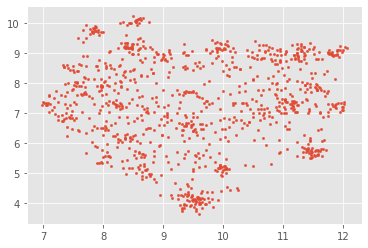

In [10]:
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5)

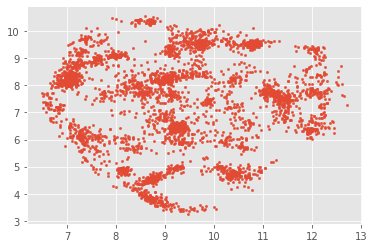

In [11]:
adv1_embedding = trans.transform(adv_1)
plt.scatter(adv1_embedding[:, 0], adv1_embedding[:, 1], s= 5)

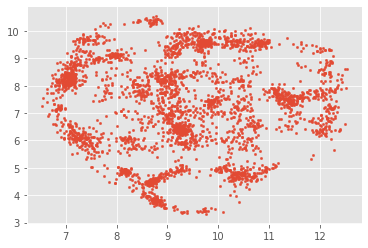

In [12]:
adv2_embedding = trans.transform(adv_2)
plt.scatter(adv2_embedding[:, 0], adv2_embedding[:, 1], s= 5)

In [13]:
x_comb = np.r_[X_ord, adv_1]
y_comb = np.r_[np.ones(len(X_ord)), np.zeros(len(adv_1))]

In [14]:
x_comb.shape

(5000, 20)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x_comb,y_comb,test_size=0.5, stratify=y_comb)

In [17]:
clf = RandomForestClassifier(class_weight="balanced")
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8928

In [18]:
clf.predict(X_test[y_test==1]).mean(), clf.predict(X_test[y_test==0]).mean()

(0.52, 0.014)

In [19]:
clf.predict(adv_2).mean(), clf.predict(adv_1).mean()

(0.0664389941012108, 0.007)

In [20]:
from alibi.utils.mapping import (
    ohe_to_ord as alibi_ohe_to_ord,
    ord_to_ohe as alibi_ord_to_ohe,
)

In [21]:
ata = pd.read_csv('german_credit.csv')
y = data['default']
X_df = data.drop('default', axis=1)

cats = [X_df.dtypes.index[i] for i in range(X_df.shape[1]) if X_df.dtypes[i]=='object']
X_df = pd.get_dummies(X_df, columns=cats)

feature_names = list(X_df.columns)
_, one_hot = create_onehot_map(feature_names, sep="_", min_dist=1, data=None)

In [22]:
data_adv = pickle.load(open("testing_gb_4p.pkl", "rb"))
adv_2p = [x[1] for x in data_adv]
origs = [x[0] for x in data_adv]

origs = alibi_ohe_to_ord(np.asarray(origs), one_hot)[0]

In [23]:
len(adv_2p), len(origs)

(230, 230)

In [24]:
x_comb = np.r_[origs, adv_2p]
y_comb = np.r_[np.ones(len(origs)), np.zeros(len(adv_2p))]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x_comb,y_comb,test_size=0.5, stratify=y_comb)

In [26]:
clf = RandomForestClassifier(class_weight="balanced")
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.508695652173913

In [27]:
clf.predict(X_test[y_test==0]).mean(), clf.predict(X_test[y_test==1]).mean()

(0.6521739130434783, 0.6695652173913044)

In [28]:
clf.predict(X_train[y_train==0]).mean(), clf.predict(X_train[y_train==1]).mean()

(0.0, 1.0)